In [9]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_style('white')
plt.set_cmap('gist_gray')


# We also install a package to read NiFTI files
!pip install --quiet nibabel
import nibabel as nib

import numpy as np
import scipy.stats

<Figure size 432x288 with 0 Axes>

In [10]:
# In this cell, we plot one slice of the MRI of a subject

# We first load the 2 files associated to raw data and segmentation
imageInput = nib.load('/content/drive/MyDrive/Project Files/sub-18_task-alice_bold_preprocessed.nii.gz')
image = imageInput.get_data()
header = imageInput.header

# Is segmentation[i, j, k] == 0 it means the voxel ijk is not a brain tissue
# It allows to simply skullstrip the image : 
#skullstripped_image = image * (segmentation > 0)

# The image and segmentation are 3D array of shape (182, 218, 182)
# Choose the dimension : 0 (sagittal), 1 (coronnal) or 2 (axial)
# dimension = 1
# Choose the slice (between 0 and 182 or 218)
# s = 50

# plt.figure(figsize=(10, 5))
# print('Shape of the MRI : {}'.format(image.shape))
# plt.subplot(131)
# plt.imshow(np.take(image, s, 50, 200))
# plt.title('Original');

#plt.subplot(132)
#plt.imshow(np.take(skullstripped_image, s, dimension))
#plt.title('Skull Stripped');

#plt.subplot(133)
#plt.imshow(np.take(segmentation, s, dimension), cmap='Paired')
#plt.title('Segmented');

In [14]:
# Loop through the each voxel in the image,
# create a 3D matrix with the correlations of the activation value each voxel in the 4D MRI
# against the surprisal list

surprisalList = [9.745940362, 7.646552284, 10.94079336, 10.15602405, 10.76964718, 8.383419524, 11.10488397, 14.2943944, 8.210005955]

correlationMatrix = []

for i in range(79):

  iArray = []
  for j in range(95):

    jArray = []
    for k in range(68):

      activationValues = image[i, j, k, 10:19]
      correleation = scipy.stats.pearsonr(activationValues, surprisalList)[0]
      
      jArray.append(correleation)

    iArray.append(jArray)

  correlationMatrix.append(iArray)

print(correlationMatrix[i][j][k])

79


In [30]:
print(correlationMatrix[20][20][20])

-0.061390798228773164


In [6]:
 # Correlation practice


x = np.arange(10, 20)

# for thing in x:
#   print(thing)

y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
print(scipy.stats.pearsonr(x, y)[0])    # Pearson's r

scipy.stats.spearmanr(x, y)   # Spearman's rho

scipy.stats.kendalltau(x, y)  # Kendall's tau

(0.758640289091187, 0.010964341301680813)


KendalltauResult(correlation=0.911111111111111, pvalue=2.9761904761904762e-05)

Shape of the MRI : (79, 95, 68, 372)


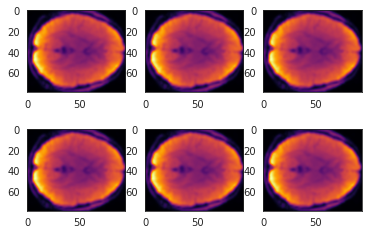

In [ ]:
print('Shape of the MRI : {}'.format(image.shape))

slice = 28;
time = 28;

plt.subplot(231)
plt.imshow(image[:,:,slice,time], cmap="inferno")
time = time + 1

plt.subplot(232)
plt.imshow(image[:,:,slice,time], cmap="inferno")
time = time + 1

plt.subplot(233)
plt.imshow(image[:,:,slice,time], cmap="inferno")
time = time + 1

plt.subplot(234)
plt.imshow(image[:,:,slice,time], cmap="inferno")
time = time + 1

plt.subplot(235)
plt.imshow(image[:,:,slice,time], cmap="inferno")
time = time + 1

plt.subplot(236)
plt.imshow(image[:,:,slice,time], cmap="inferno")

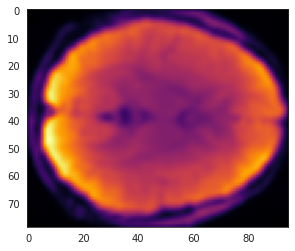

In [ ]:
plt.imshow(image[:,:,slice,time], cmap="inferno")

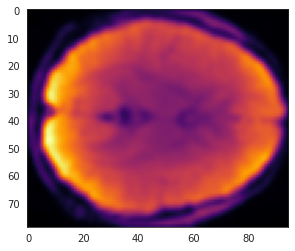

In [ ]:
plt.imshow(image[:,:,28,30], cmap="inferno")

In [ ]:
array = image[20, 20, 28, :]

for value in image[20, 20, 28, :]:
  print(value)

print(max(array))
print(min(array))

0
4710
4659
4664
4652
4658
4654
4641
4665
4660
4633
4636
4625
4643
4668
4664
4664
4667
4668
4659
4673
4664
4643
4643
4643
4652
4643
4638
4623
4660
4652
4645
4648
4650
4632
4629
4652
4635
4658
4647
4638
4629
4639
4634
4639
4617
4646
4654
4665
4640
4649
4647
4627
4648
4657
4633
4649
4628
4639
4659
4649
4635
4643
4630
4651
4632
4648
4630
4632
4631
4645
4643
4642
4645
4661
4654
4634
4640
4631
4657
4642
4636
4633
4650
4654
4628
4647
4633
4640
4652
4650
4628
4627
4623
4639
4670
4682
4655
4635
4625
4627
4636
4633
4638
4640
4636
4625
4633
4641
4648
4624
4648
4645
4627
4617
4614
4612
4656
4623
4638
4649
4640
4616
4618
4632
4631
4643
4634
4621
4608
4647
4643
4646
4638
4641
4645
4633
4635
4640
4661
4646
4638
4626
4632
4636
4637
4646
4650
4660
4652
4649
4651
4659
4644
4651
4645
4644
4636
4646
4648
4642
4644
4651
4641
4636
4627
4651
4677
4660
4632
4652
4634
4634
4625
4623
4619
4667
4658
4641
4648
4652
4660
4637
4646
4629
4622
4644
4639
4625
4623
4633
4637
4627
4632
4631
4647
4636
4638
4638
4644
464

In [ ]:
print(header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  79  95  68 372   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.  2.  2.  2.  0.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'spm - 3D normalized - conv(3,3,3)'
aux_file        : b''
qform_code      : aligned
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 78.0
qoffset_y       : -112.0
qoffset_z       : -50.0
srow_x  